# Your mission

You started working in a financial institution. You manager Mark is insterested in investing and trading **Bitcoin** to diversify his portfolio. So he turned to you to develop a crypto trading bot.

A **crypto trading bot** is a computer program with an underlying predictive model that automatically outputs a predicted day to day price for the next 30 days based on the history of Bitcoin market price and Blockchain variables. 

Your mission is to train an accurate predictive model with the lowest mean squared error. Mark is a very technical guy, he likes to understand all **technical details** and would like you to **compare the performances of classical models and neural-net based models**.

Your **target variable** is the Bitcoin Market price.

**Data source** : https://blockchain.info/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import helper_functions as hf

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Data Exploration

In this section, you are to explore the data. You are to fulfill the following tasks:
- **Univariate analysis**
    - study the Bitcoin market price time series, in terms of its trend, cycle, seasonality, and stationnarity 
    - **Tips**: you can analyse ACF, PACF plots, perform Augmented Dickey-Fuller test
- **Multivariate analysis**
    - study other blockchain variables, retrieve insights
    - study the correlation between the Bitcoin market price and other blockchain variables 
    - **Tips**: Pearson correlation

In [2]:
df_blockchain = pd.read_csv("./df_blockchain.csv", delimiter=";")


df_blockchain.head()

,Date,market-price,n-transactions-per-block,median-confirmation-time,hash-rate,difficulty,miners-revenue,trade-volume,blocks-size,avg-block-size,...,cost-per-transaction,n-unique-addresses,n-transactions,n-transactions-total,n-transactions-excluding-popular,output-volume,estimated-transaction-volume,estimated-transaction-volume-usd,total-bitcoins,market-cap
0,2011-09-13,6.88,45.908451,0.0,12.018816,1.777774e+06,52318.011503,0.0,592.190091,0.019009,...,7.666766,12622.0,6519.0,1497195.0,6519.0,358543.612114,58615.641320,403275.612279,7.257416e+06,5.022014e+07
1,2011-09-14,6.19,42.465753,0.0,13.263925,1.755425e+06,48306.468911,0.0,594.907367,0.018007,...,7.369408,12408.0,6200.0,1503780.0,6200.0,302619.024544,74521.484625,461287.989830,7.264662e+06,4.540930e+07
2,2011-09-15,5.92,41.500000,0.0,12.914875,1.755425e+06,60431.444952,0.0,597.554226,0.018240,...,7.333913,12988.0,6474.0,1509972.0,6474.0,299226.130646,79422.402932,470180.625359,7.272284e+06,4.322228e+07
3,2011-09-16,5.58,52.176471,0.0,10.995096,1.755425e+06,34345.021913,0.0,600.362512,0.022136,...,5.466341,12059.0,6209.0,1516381.0,6209.0,674606.861338,82696.853247,461448.441118,7.279040e+06,4.088136e+07
4,2011-09-17,5.18,40.701493,0.0,10.733308,1.755425e+06,36805.913687,0.0,602.995510,0.017116,...,6.489054,10988.0,5454.0,1522600.0,5454.0,354198.945778,68238.166521,353473.702578,7.285375e+06,3.801833e+07


In [3]:
df_blockchain.columns.sort_values().shape

(23,)

## Log rendements

Text(0.5, 1.0, 'diff(price)')

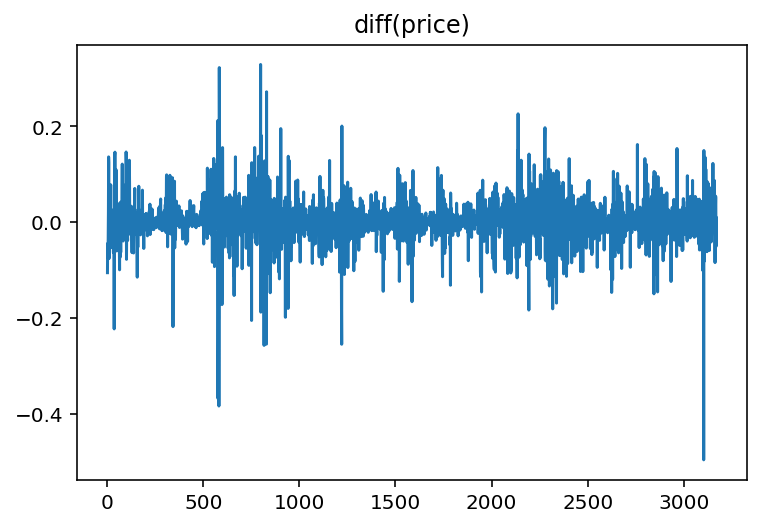

In [4]:
df_log = np.log(df_blockchain["market-price"]).diff().dropna()
df_log.plot()
plt.title("diff(price)")

Text(0.5, 1.0, 'log price')

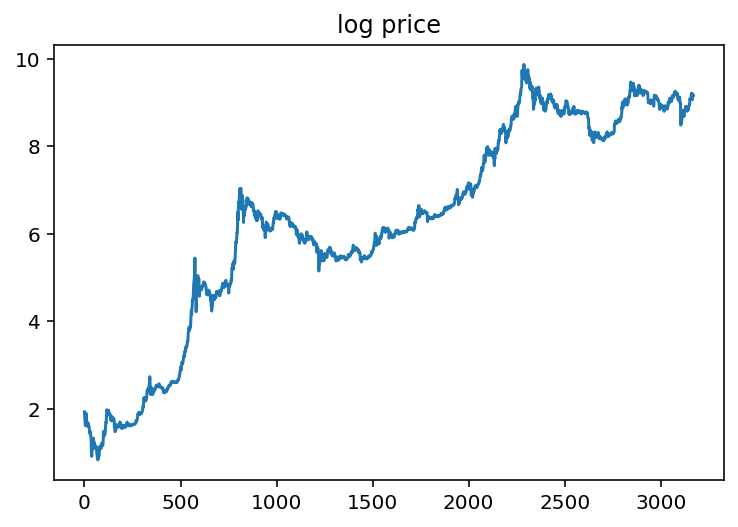

In [5]:
log_price = np.log(df_blockchain["market-price"])
plt.plot(log_price)
plt.title("log price")

## Autocorrélogrammes

#### 1 - diff(log(price))

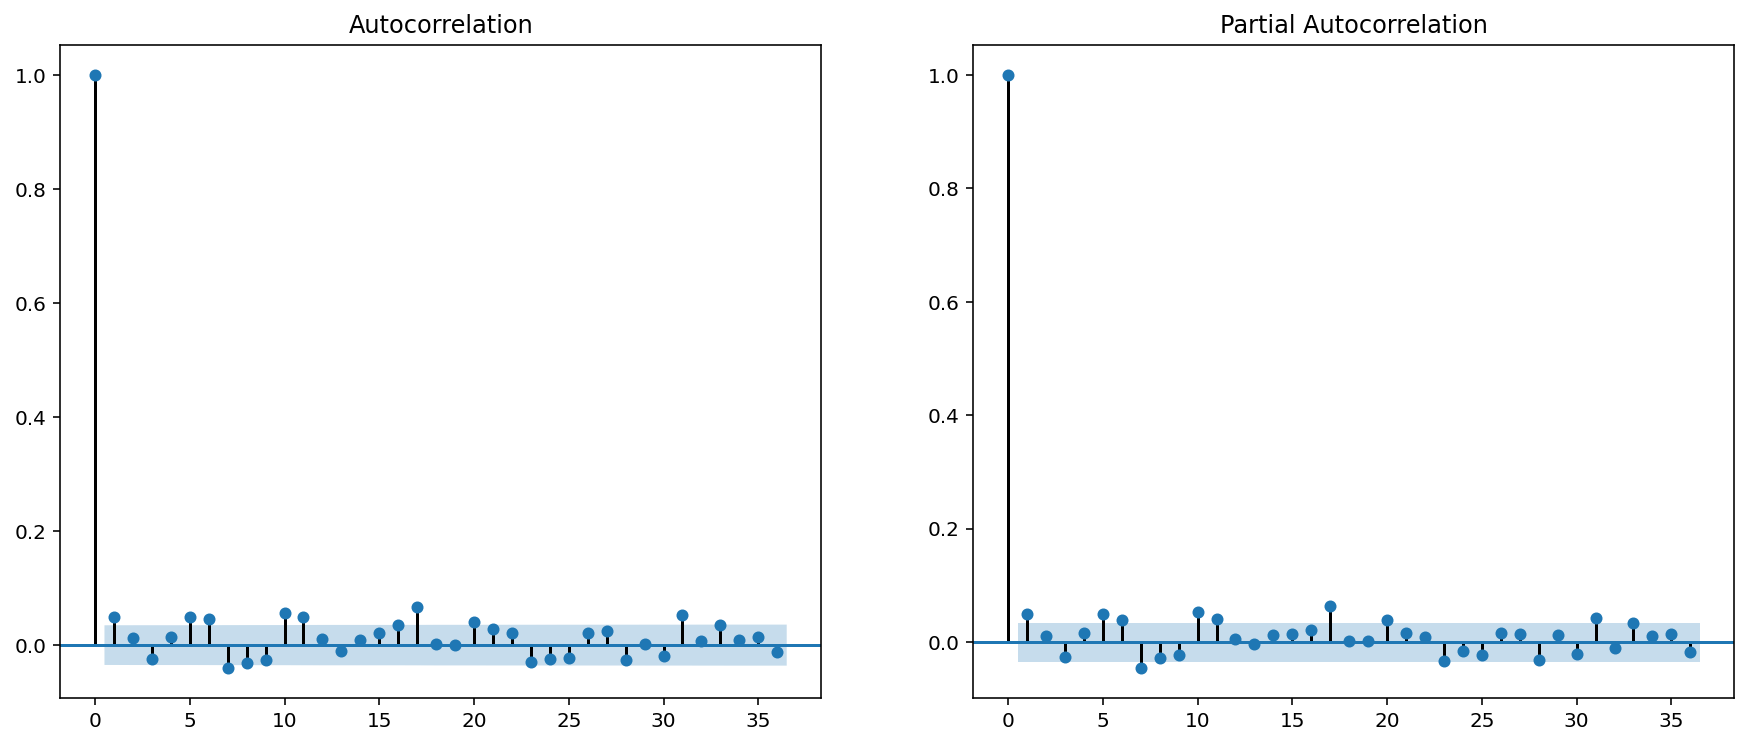

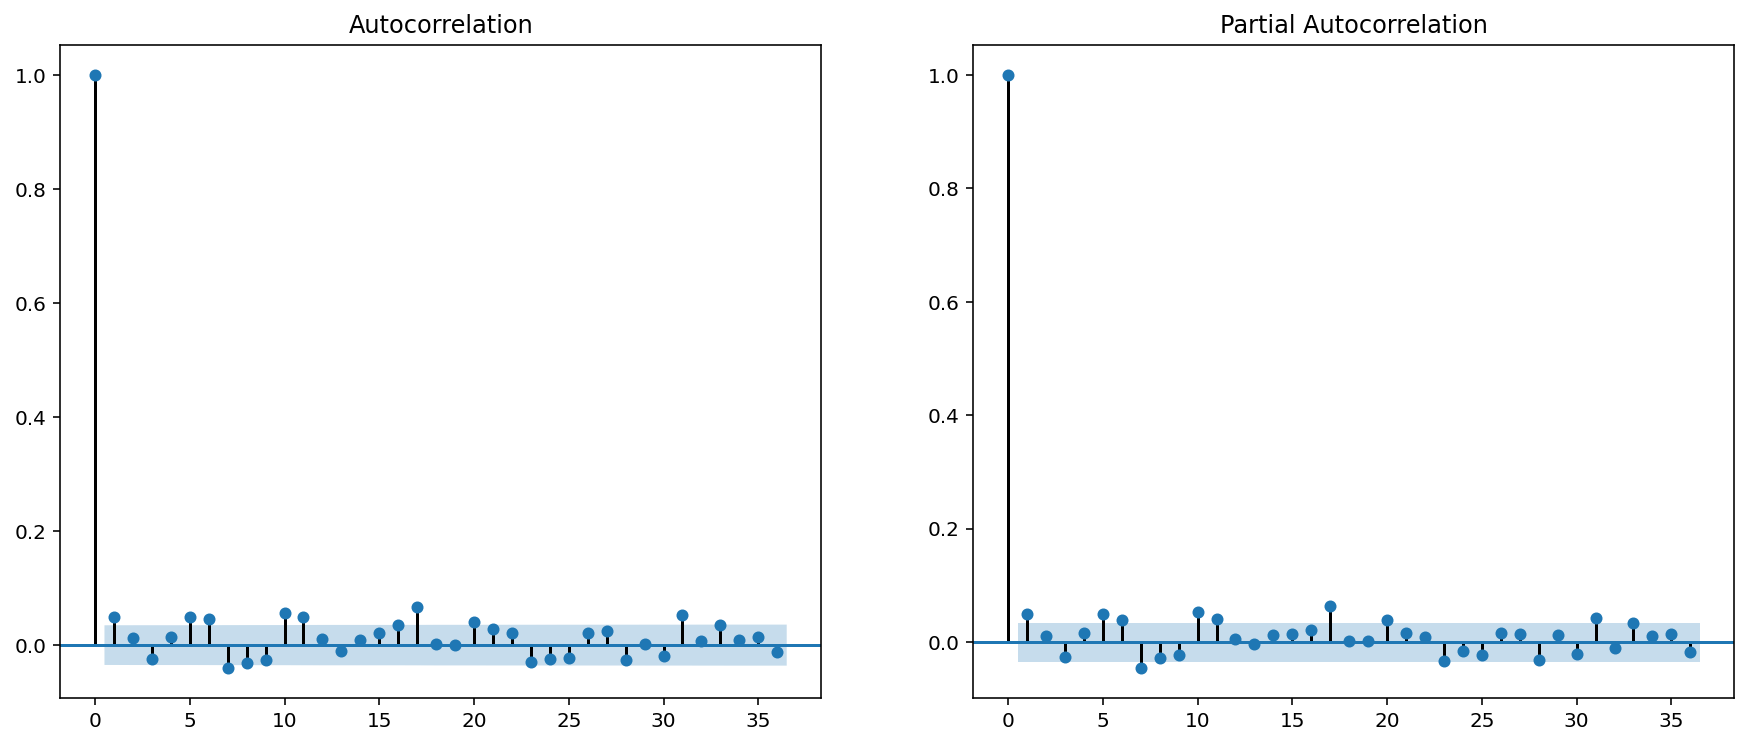

In [6]:
fig = plt.figure(figsize = (15, 6))
layout = (1, 2)
ax1 = plt.subplot2grid(layout, (0, 0))
ax2 = plt.subplot2grid(layout, (0, 1))

plot_acf(df_log, ax=ax1)
plot_pacf(df_log, ax=ax2)

#### 2 - diff(price)

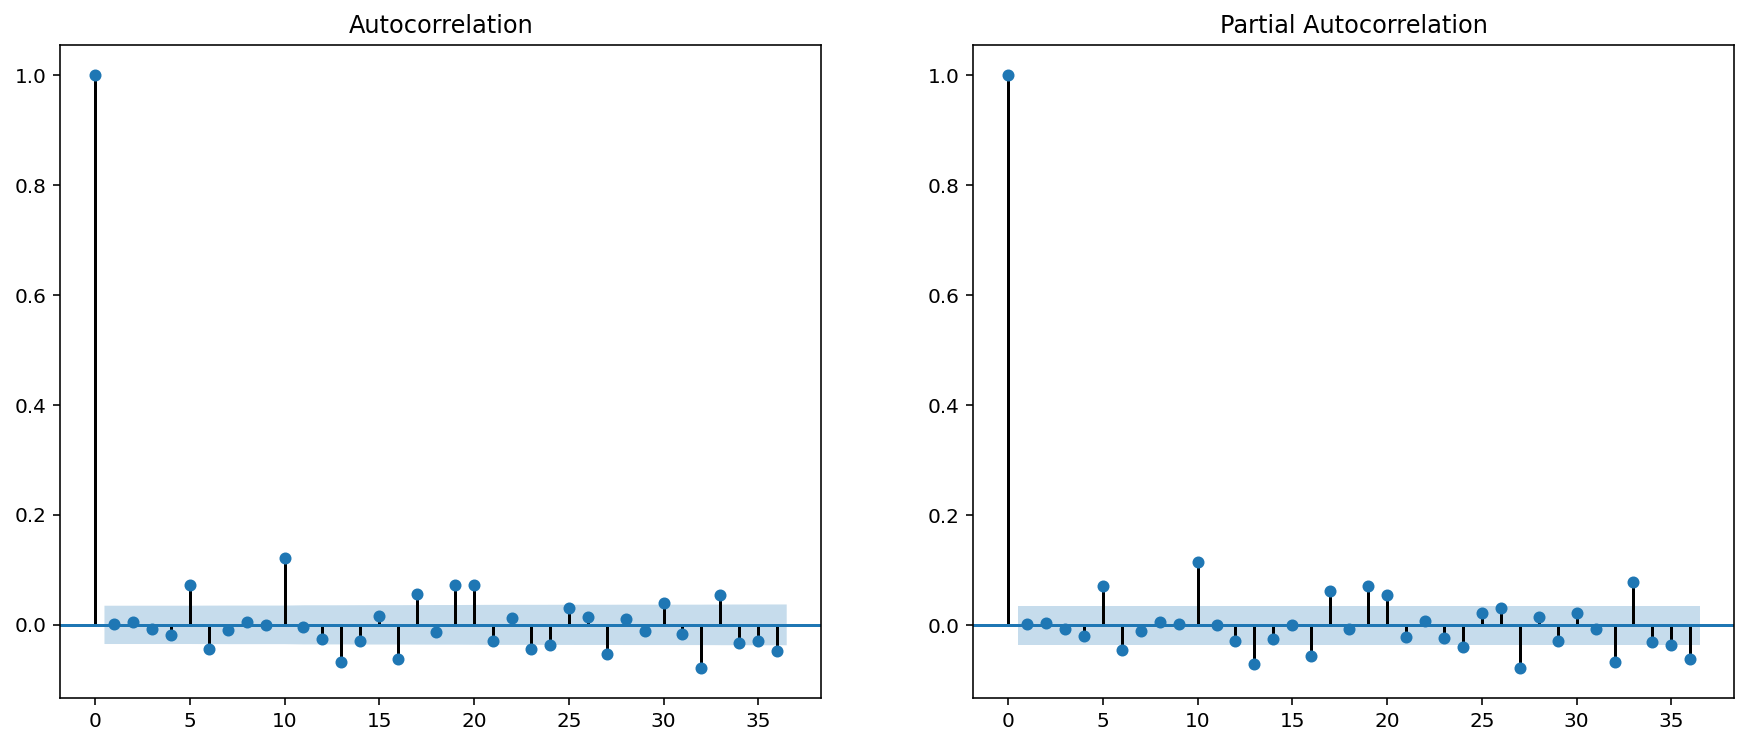

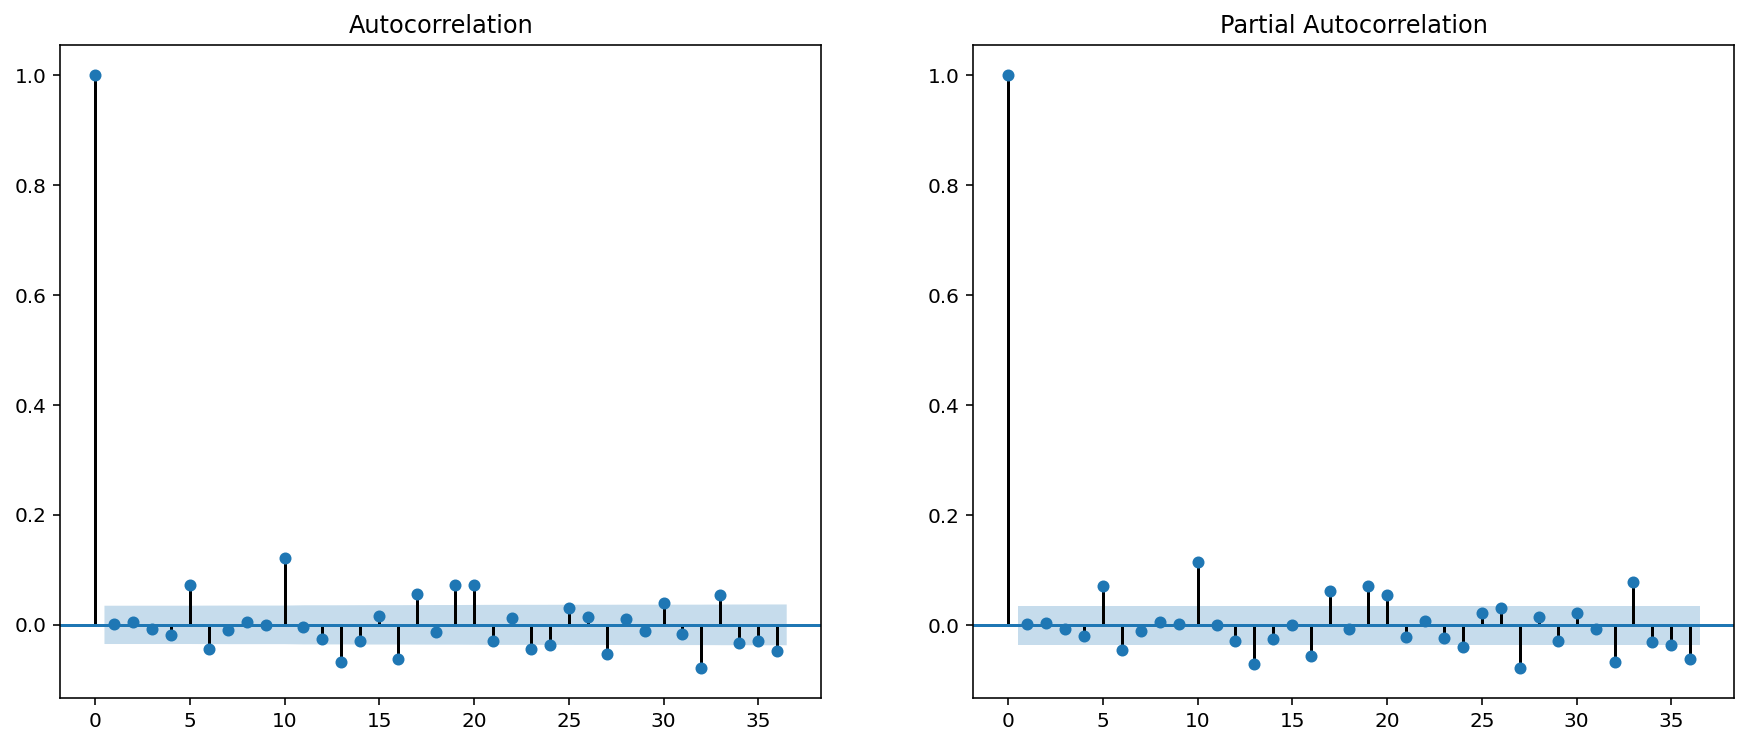

In [7]:
df_diff = df_blockchain["market-price"].diff().dropna()
fig = plt.figure(figsize = (15, 6))
layout = (1, 2)
ax1 = plt.subplot2grid(layout, (0, 0))
ax2 = plt.subplot2grid(layout, (0, 1))

plot_acf(df_diff, ax=ax1)
plot_pacf(df_diff, ax=ax2)

#### 3 - Price

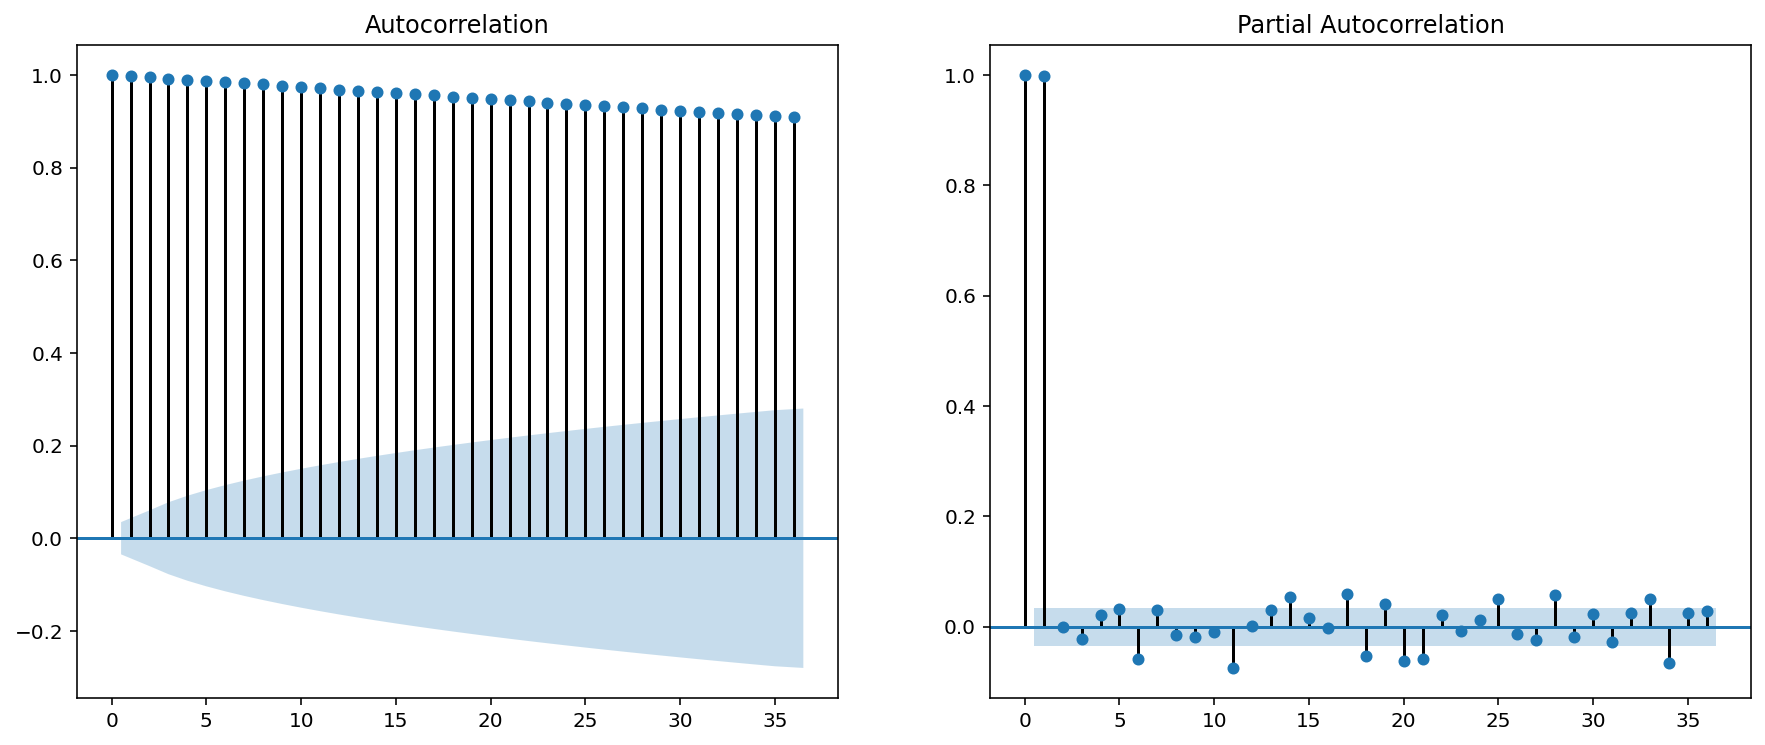

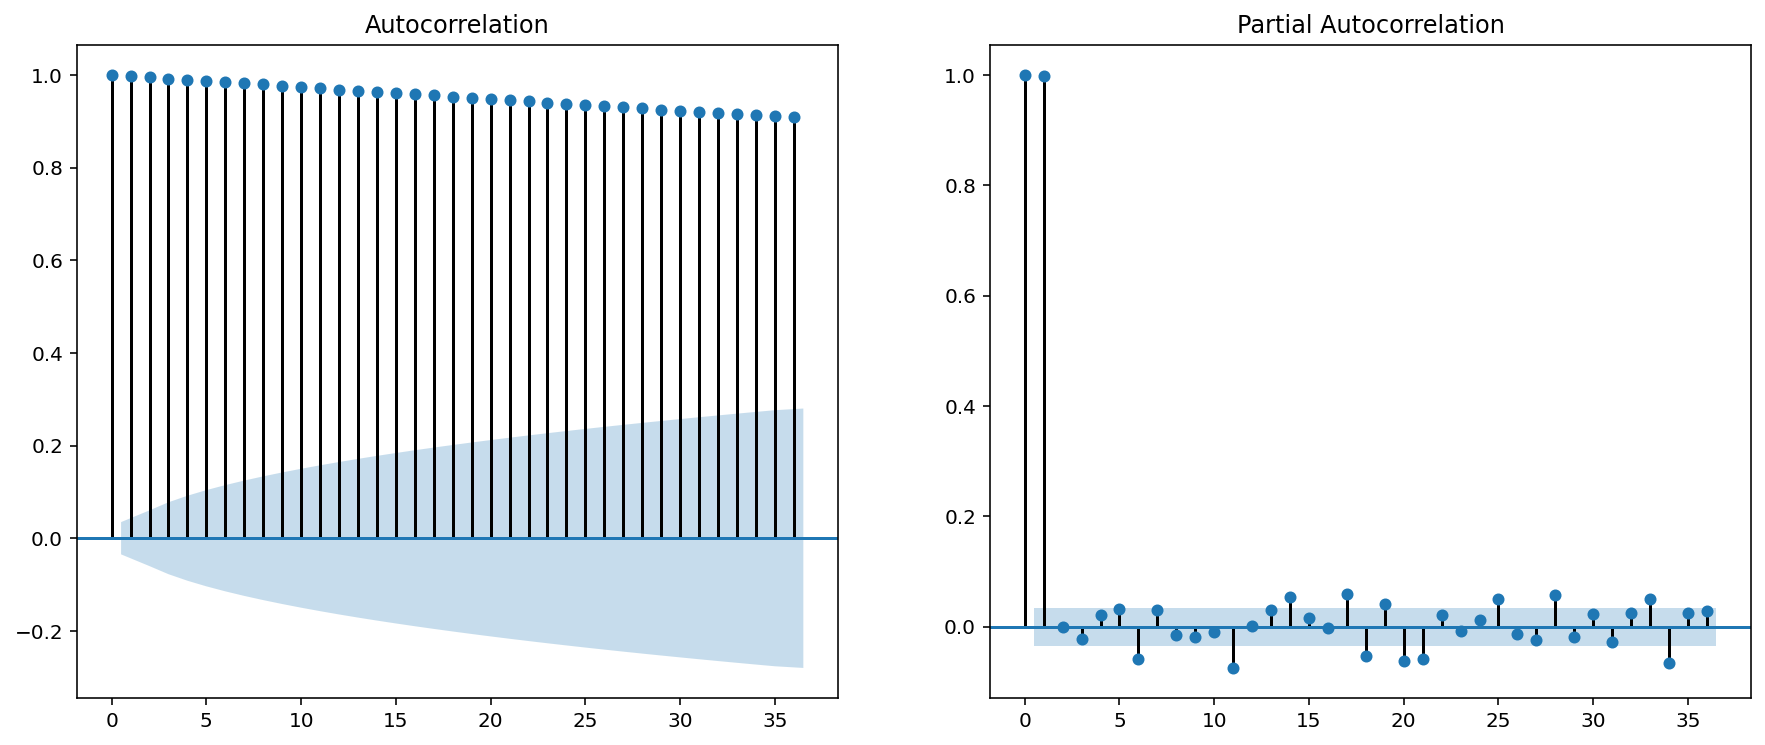

In [8]:
fig = plt.figure(figsize = (15, 6))
layout = (1, 2)
ax1 = plt.subplot2grid(layout, (0, 0))
ax2 = plt.subplot2grid(layout, (0, 1))

plot_acf(df_blockchain["market-price"], ax=ax1)
plot_pacf(df_blockchain["market-price"], ax=ax2)

#### Test de dickey fuller pour vérifier la stationnarité de diff(prix)

In [9]:
result = adfuller(df_diff)
print('Statistiques ADF : {}'.format(result[0]))
print('p-value : {}'.format(result[1]))
print('Valeurs Critiques :')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Statistiques ADF : -10.777577165502596
p-value : 2.298749932438669e-19
Valeurs Critiques :
	1%: -3.4324329568756182
	5%: -2.8624603219621836
	10%: -2.5672599089804424


#### Test de dickey fuller pour vérifier la stationnarité de diff(log(prix))

In [10]:
result = adfuller(df_log)
print('Statistiques ADF : {}'.format(result[0]))
print('p-value : {}'.format(result[1]))
print('Valeurs Critiques :')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Statistiques ADF : -11.61509619845477
p-value : 2.4598079351220704e-21
Valeurs Critiques :
	1%: -3.4324263431163704
	5%: -2.8624574007945007
	10%: -2.567258353800826


**Conclusion** : 

On trouve une p-value plus petite pour diff(log(price)), donc on va fitter l'ARIMA sur log(price).

## Train test split

In [11]:
X_train, X_test = hf.data_split(df_blockchain["market-price"])
# X_train.fillna(X_train.mean())

# Modeling with ARIMA
In this section, you are to perform some classical modelings, the suggested method here is ARIMA, but you can try other models such as ARMA, ARIMAX, SARIMAX...

## Search for the best ARIMA model
We use grid search to search for the best ARIMA parameters that gives the lowest error. This follows the Box-Jenkins methology.

In [13]:
best_cfg, best_score = hf.arima_grid_search(X_train,
                                            X_test,
                                            [0,1,2,3], [1,2], [0,1,2,3])

ARIMA(0,1,0) RMSE=352.031


ARIMA(0,1,1) RMSE=352.080


ARIMA(0,1,2) RMSE=352.182


ARIMA(0,1,3) RMSE=351.858


ARIMA(0,2,0) RMSE=486.433


ARIMA(0,2,1) RMSE=351.644


ARIMA(0,2,2) RMSE=351.689


ARIMA(0,2,3) RMSE=351.799


ARIMA(1,1,0) RMSE=352.081


ARIMA(1,1,1) RMSE=352.098


ARIMA(1,1,2) RMSE=352.159


ARIMA(1,1,3) RMSE=351.716


ARIMA(1,2,0) RMSE=428.550


ARIMA(1,2,1) RMSE=351.690


ARIMA(1,2,2) RMSE=351.329


ARIMA(1,2,3) RMSE=351.723


ARIMA(2,1,0) RMSE=352.181


ARIMA(2,1,1) RMSE=352.166


ARIMA(2,1,2) RMSE=352.248


ARIMA(2,1,3) RMSE=352.655


ARIMA(2,2,0) RMSE=435.467


ARIMA(2,2,1) RMSE=351.798


ARIMA(2,2,2) RMSE=351.746


ARIMA(2,2,3) RMSE=349.756


ARIMA(3,1,0) RMSE=351.968


ARIMA(3,1,1) RMSE=352.388


ARIMA(3,1,2) RMSE=350.740


ARIMA(3,2,0) RMSE=425.924


ARIMA(3,2,1) RMSE=351.608


ARIMA(3,2,2) RMSE=353.435


ARIMA(3,2,3) RMSE=351.133
Best ARIMA(2, 2, 3) MSE=349.756


## Modeling
The following code allows ARIMA modeling with one combination of (p,d,q).

In [12]:
best = (2,2,3)
errors, predictions = hf.evaluate_arima_model(X_train,
                                              X_test, best)
errors

349.7558917856032

### Recherche du meilleur ARIMA pour d = 1

In [12]:
best_cfg, best_score = hf.arima_grid_search(X_train,
                                            X_test,
                                            [0,1,2,3], [1], [0,1,2,3])

ARIMA(0,1,0) RMSE=352.031


ARIMA(0,1,1) RMSE=352.080


ARIMA(0,1,2) RMSE=352.182


ARIMA(0,1,3) RMSE=351.858


ARIMA(0,1,4) RMSE=350.637


ARIMA(1,1,0) RMSE=352.081


ARIMA(1,1,1) RMSE=352.098


ARIMA(1,1,2) RMSE=352.159


ARIMA(1,1,3) RMSE=351.716


ARIMA(1,1,4) RMSE=348.957


ARIMA(2,1,0) RMSE=352.181


ARIMA(2,1,1) RMSE=352.166


ARIMA(2,1,2) RMSE=352.248


ARIMA(2,1,3) RMSE=352.655


ARIMA(2,1,4) RMSE=349.205


ARIMA(3,1,0) RMSE=351.968


ARIMA(3,1,1) RMSE=352.388


ARIMA(3,1,2) RMSE=350.740


ARIMA(3,1,4) RMSE=352.429


ARIMA(4,1,0) RMSE=350.829


ARIMA(4,1,1) RMSE=349.192


ARIMA(4,1,2) RMSE=347.663


ARIMA(4,1,3) RMSE=356.881


ARIMA(4,1,4) RMSE=355.875
Best ARIMA(4, 1, 2) MSE=347.663


## Visualization
To have a better view on the difference between true and predict values, we visualize them by plotting both the signals.

In [13]:
# prepare the dataset for plotting
predict_date = df_blockchain.iloc[-30::]["Date"]
df_predict = pd.DataFrame(zip(predict_date,
                              predictions, X_test.values),
                          columns=["date", "predict", "true"])

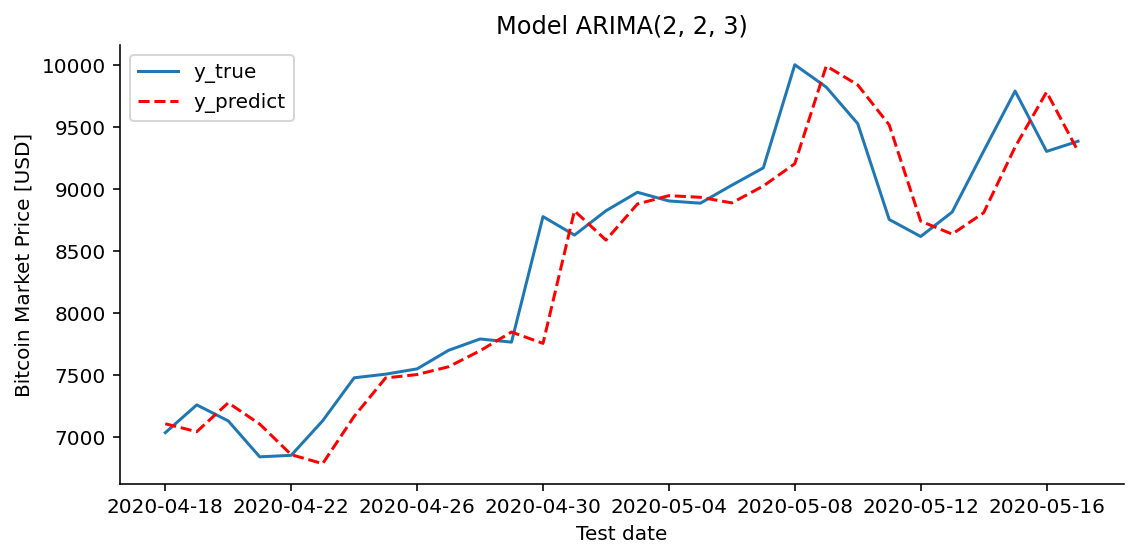

In [14]:
fig, ax = plt.subplots(figsize=(8,4))

sns.lineplot(x="date", y="true", data=df_predict, 
             ax=ax, label="y_true", markers=True )
plot_ = sns.lineplot(x="date",
             y="predict",
             data=df_predict,
             color="red",ax=ax, label="y_predict")
plot_.lines[1].set_linestyle("--")
new_ticks = plot_.get_xticklabels()
freq = 4
ax.set_xticks(np.arange(0, len(new_ticks), freq))
labels = predict_date[::freq]
ax.set_xticklabels(labels)
ax.set_ylabel("Bitcoin Market Price [USD]")
ax.set_xlabel("Test date")
ax.set_title("Model ARIMA{}".format(best))
sns.despine()
plt.legend()
plt.tight_layout()

# Modeling with SARIMAX
In this section, you are to perform some classical modelings, the suggested method here is ARIMA, but you can try other models such as ARMA, ARIMAX, SARIMAX...

## Modeling
The following code allows SARIMAx modeling with one combination of (p,d,q) and seasonal parameters (P,D,Q)m.

In [12]:
import statsmodels.api as sm

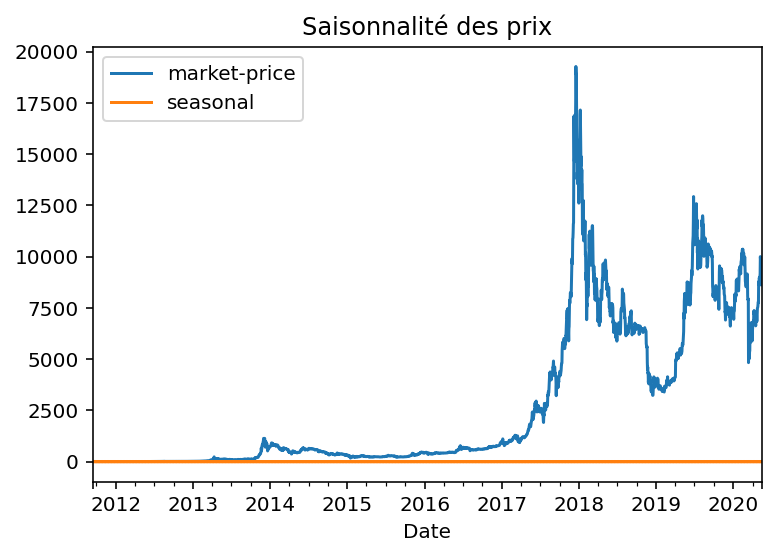

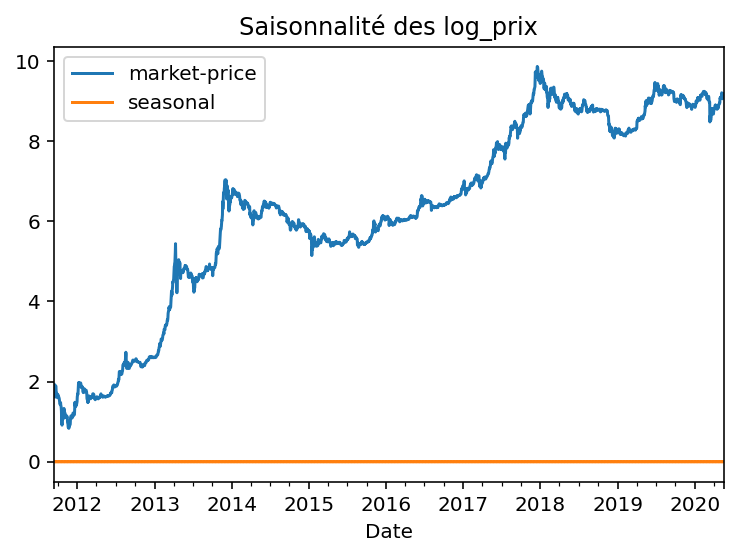

<Figure size 432x288 with 0 Axes>

In [13]:
y = pd.read_csv("./df_blockchain.csv", delimiter=";")
y.reset_index(inplace=True)
y['Date'] = pd.to_datetime(y['Date'])
y = y.set_index('Date')
y_prix = y["market-price"]
decomposition = sm.tsa.seasonal_decompose(y_prix, model='additive')
decomposition.observed.plot()
decomposition.seasonal.plot()
plt.title("Saisonnalité des prix")
plt.legend()
plt.show()

y_log = np.log(y_prix)
y_log.fillna(y_log.mean())
decomposition = sm.tsa.seasonal_decompose(y_log, model='additive')
decomposition.observed.plot()
decomposition.seasonal.plot()
plt.title("Saisonnalité des log_prix")
plt.legend()
plt.show()
plt.tight_layout()

**Commentaires**:

La décomposition sous forme de saisonnalité renvoie des courbes horizontales, ceci à la fois pour les prix et les log_prix. On en déduit qu'une modélisation SARIMAX est impossible. **Mais faut essayer apparemment. So let's go**